In [70]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv("/Users/fredericksafian/VSCODE/finaldata/merged_with_dummies.csv")

# df = pd.read_csv('/Users/fredericksafian/VSCODE/finaldata/merged_with_dummies.csv')

In [72]:
# Checking for missing values in the target variable 'NO2_tomorrow'

missing_values_target = df['NO2_tomorrow'].isnull().sum() #revealed 708 missing values, we will delete these rows
df = df.dropna(subset=['NO2_tomorrow'])

In [73]:
# Checking for columns with a high percentage of missing values

missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

#columns with more than 10% missing values
columns_high_missing_values = missing_values_percentage[missing_values_percentage > 10].sort_values(ascending=False)

columns_high_missing_values

SO2       64.722492
StrGlo    64.669549
CO        64.643078
PN        49.527927
PM2.5     46.801377
WVs       35.480455
dtype: float64

In [52]:
# we will drop these above (and just below) 50% for sure

columns_to_drop = ['SO2', 'StrGlo', 'CO', 'PN', 'PM2.5']
df = df.drop(columns=columns_to_drop)

## Missing Value Handling

Below we take a look at how we should handle the remaining missing values.

First we observe how many missing values there are in each column.

In [74]:
# Count NaNs for all columns
missing_count_per_column = df.isna().sum()

# Filter columns with missing values
columns_with_missing_values = missing_count_per_column[missing_count_per_column > 0]

# Display the count of missing values for columns with missing values
print(columns_with_missing_values)


NO                24
NO2               24
NOx               24
O3                90
O3_max_h1         94
O3_nb_h1>120      94
PM10             269
PM2.5           5304
CO              7326
SO2             7335
PN              5613
RainDur           25
T                 80
T_max_h1          84
p                 35
StrGlo          7329
WD               598
WVv              598
WVs             4021
Hr               123
dtype: int64


We observe that there are a total of 16 columns that contain missing values.
We plot a histogram of each of the 16 columns to observe the distribution of the data.

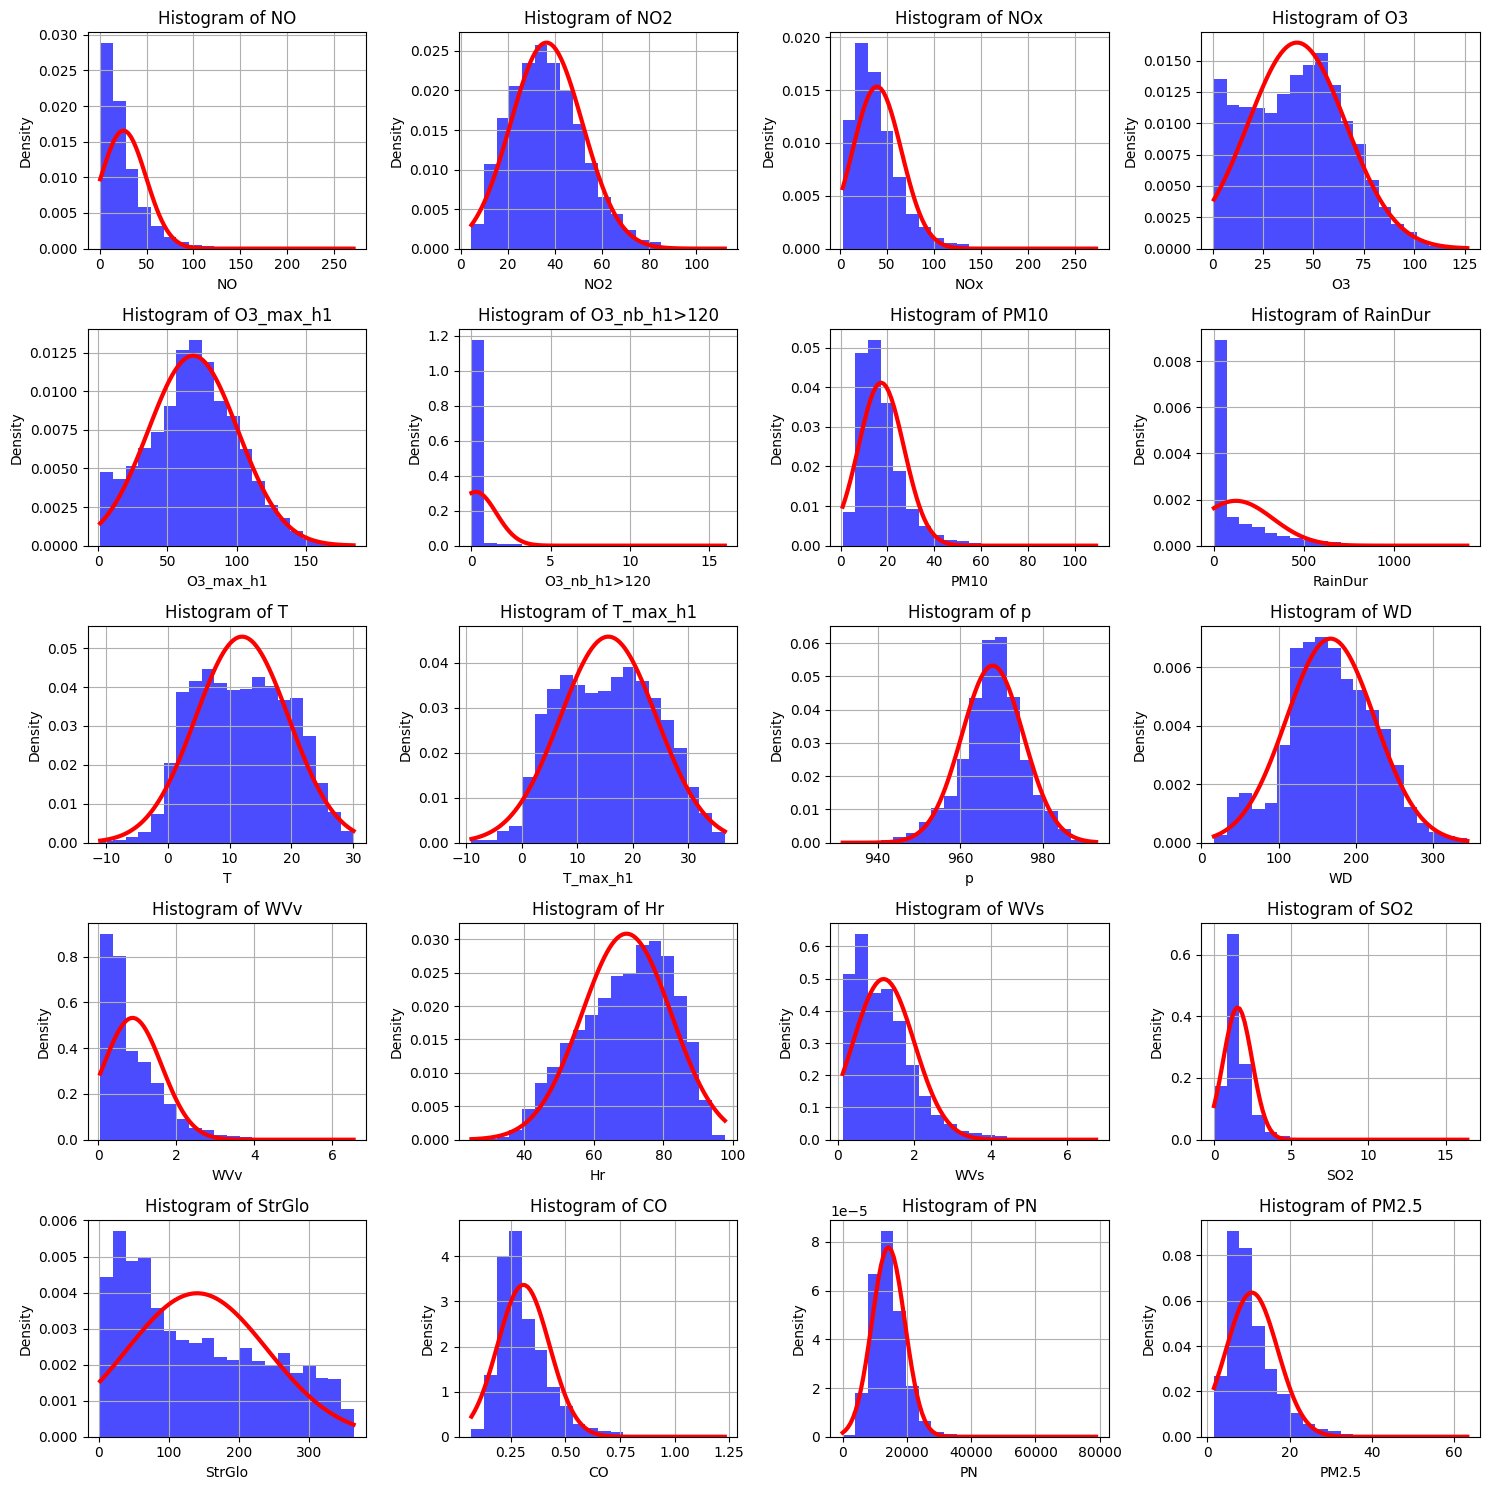

In [76]:
import matplotlib.pyplot as plt

# Columns with missing values
columns_with_missing_values = [
    "NO", "NO2", "NOx", "O3", "O3_max_h1", "O3_nb_h1>120", "PM10",
    "RainDur", "T", "T_max_h1", "p", "WD", "WVv", "Hr", 'WVs','
]

# Create a 4x4 subplot grid
fig, axes = plt.subplots(5, 4, figsize=(15, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot histograms for columns with missing values
for i, column_name in enumerate(columns_with_missing_values):
    column_data = df[column_name].dropna()
    axes[i].hist(column_data, bins=20, color='blue', alpha=0.7, density=True)
    axes[i].set_title(f'Histogram of {column_name}')
    axes[i].set_xlabel(column_name)
    axes[i].set_ylabel('Density')
    axes[i].grid(True)

    # Calculate mean and standard deviation
    mu = column_data.mean()
    sigma = column_data.std()

    # Generate a range of values
    x = np.linspace(column_data.min(), column_data.max(), 100)

    # Plot the normal distribution curve
    axes[i].plot(x, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)),
                 lw=3, color='red')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

We observe that for bascially all of the histograms there is a central tendency. This means that the probability of the missing values being around the mean is very high, which means that we can simply use the mean to fill in these missing values.

If the data was dispersed as in the histogram below, using the mean would lead to distorted results

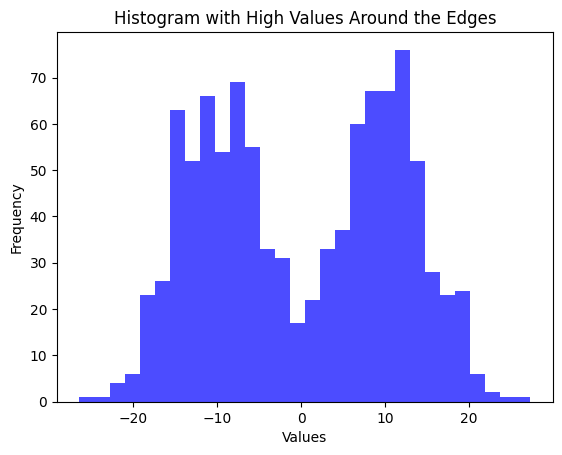

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a dataset with high values around the edges
data = np.concatenate([np.random.normal(loc=-10, scale=5, size=500),
                       np.random.normal(loc=10, scale=5, size=500)])

# Create a histogram
plt.hist(data, bins=30, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with High Values Around the Edges')

# Show the plot
plt.show()


In [77]:
# Count occurrences of each unique value in the "RainDur" column
raindur_counts = df['RainDur'].value_counts()

# Print the counts
print(raindur_counts)


RainDur
0.00      4738
0.02        35
0.03        30
0.07        26
0.05        25
          ... 
47.27        1
126.65       1
53.97        1
206.20       1
83.83        1
Name: count, Length: 5466, dtype: int64


In [79]:
# Finding rows with multiple NaN values
rows_with_multiple_nans = df[df.isna().sum(axis=1) > 10]

# Identifying the names of features missing in rows with multiple NaNs
missing_features = rows_with_multiple_nans.isna().apply(lambda x: list(x[x].index), axis=1)

missing_features_df = missing_features.to_frame(name="Missing Features")

In [80]:
row_indices = missing_features.index
selected_rows = df.loc[row_indices]

selected_rows

,Unnamed: 0,Unnamed: 0.1,Datum,TotalDailyTraffic,Street,NO,NO2,NOx,O3,O3_max_h1,...,200m_green,1.5km_trees,1km_trees,500m_trees,200m_trees,WD,WVv,WVs,Hr,NO2_tomorrow
1824,1824,1824,2016-12-29,0.0,Zch_Stampfenbachstrasse,NaN,NaN,NaN,NaN,NaN,...,132,9115,4054,1419,152,53.079333,1.124667,1.144667,80.798000,44.90
2993,2993,2993,2020-03-12,13491.0,Zch_Stampfenbachstrasse,NaN,NaN,NaN,NaN,NaN,...,132,9115,4054,1419,152,279.660000,2.781250,2.956250,58.125000,18.68
4492,4492,4492,2013-04-23,28271.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,172.623750,0.429583,NaN,67.625000,53.37
5258,5258,5258,2015-05-29,27654.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,173.899286,0.614286,NaN,36.440714,21.22
5395,5395,5395,2015-10-13,27565.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,NaN,NaN,NaN,NaN,42.74
5396,5396,5396,2015-10-14,22276.0,Zch_Schimmelstrasse,38.61,42.74,53.31,NaN,NaN,...,140,10143,4389,1138,124,124.774167,0.957500,NaN,59.530909,44.94
6307,6307,6307,2018-04-12,30103.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,169.480769,0.517692,NaN,24.889167,38.81
6925,6925,6925,2019-12-21,27330.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,125.975556,0.187778,NaN,83.004444,17.55
6959,6959,6959,2020-01-24,31233.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,272.637857,0.197143,0.656154,80.359231,52.69
6983,6983,6983,2020-02-17,27271.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,177.626000,0.531333,1.194000,72.502857,24.66


We find that there are 20 rows where all meteo data is missing. In order to impute those values, we take the average of the respective meteo data from the day before and the next day. We see that the rows are not at the end/beginning of a specific street, hence we know that the previous/next column will correspond to yesterday's/tomorrow's values.

In [81]:
# Function to get value if index exists, else None
def get_value_if_exists(df, idx, column):
    if idx in df.index:
        return df.loc[idx, column]
    return None

# Impute missing values
for idx in missing_features_df.index:
    for column in missing_features_df.loc[idx, "Missing Features"]:
        prev_day_value = get_value_if_exists(df, idx - 1, column) or get_value_if_exists(df, idx - 2, column)
        next_day_value = get_value_if_exists(df, idx + 1, column) or get_value_if_exists(df, idx + 2, column)

        if pd.notna(prev_day_value) and pd.notna(next_day_value):
            mean_value = (prev_day_value + next_day_value) / 2
            df.loc[idx, column] = mean_value

# The df DataFrame now has imputed values
row_indices = missing_features.index
selected_rows = df.loc[row_indices]
selected_rows


,Unnamed: 0,Unnamed: 0.1,Datum,TotalDailyTraffic,Street,NO,NO2,NOx,O3,O3_max_h1,...,200m_green,1.5km_trees,1km_trees,500m_trees,200m_trees,WD,WVv,WVs,Hr,NO2_tomorrow
1824,1824,1824,2016-12-29,0.0,Zch_Stampfenbachstrasse,23.195,45.050,42.160,10.340,20.635,...,132,9115,4054,1419,152,53.079333,1.124667,1.144667,80.798000,44.90
2993,2993,2993,2020-03-12,13491.0,Zch_Stampfenbachstrasse,3.715,18.410,12.610,59.080,78.130,...,132,9115,4054,1419,152,279.660000,2.781250,2.956250,58.125000,18.68
4492,4492,4492,2013-04-23,28271.0,Zch_Schimmelstrasse,24.435,39.575,40.285,38.645,78.515,...,140,10143,4389,1138,124,172.623750,0.429583,NaN,67.625000,53.37
5258,5258,5258,2015-05-29,27654.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,173.899286,0.614286,NaN,36.440714,21.22
5395,5395,5395,2015-10-13,27565.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,NaN,NaN,NaN,NaN,42.74
5396,5396,5396,2015-10-14,22276.0,Zch_Schimmelstrasse,38.610,42.740,53.310,NaN,NaN,...,140,10143,4389,1138,124,124.774167,0.957500,NaN,59.530909,44.94
6307,6307,6307,2018-04-12,30103.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,169.480769,0.517692,NaN,24.889167,38.81
6925,6925,6925,2019-12-21,27330.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,125.975556,0.187778,NaN,83.004444,17.55
6959,6959,6959,2020-01-24,31233.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,272.637857,0.197143,0.656154,80.359231,52.69
6983,6983,6983,2020-02-17,27271.0,Zch_Schimmelstrasse,NaN,NaN,NaN,NaN,NaN,...,140,10143,4389,1138,124,177.626000,0.531333,1.194000,72.502857,24.66


we see that we were able to impute some of the missing values. however, for the most rows, the neighboring rows were already deleted before due to missing values in the target variable. for the rest of the variables, it makes no sense to impute. we would then have multiple columns full of the same values, but with different target varibales. this would strongly distort our model. hence we will delete the rest of these rows. 

In [82]:
#removing the rows for which this imputation technique did not work

# Identifying rows in missing_features_df that still have more than 10 NaN values in df
rows_to_drop = [idx for idx in missing_features_df.index if df.loc[idx].isna().sum() > 10]
df.drop(rows_to_drop, inplace=True)



**Missing Data in the TotalDailyTraffic Column**

now we take a look at the TotalDailyTraffic. Because we calculated it ourselves, there are no NaN but possibly zero

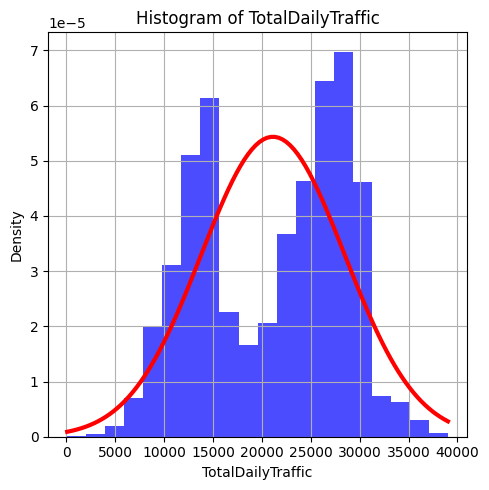

In [83]:
df['TotalDailyTraffic'].replace(0, np.nan, inplace=True)

plt.figure(figsize=(5, 5))

column_data = df['TotalDailyTraffic'].dropna()
plt.hist(column_data, bins=20, color='blue', alpha=0.7, density=True)
plt.title('Histogram of TotalDailyTraffic')
plt.xlabel('TotalDailyTraffic')
plt.ylabel('Density')
plt.grid(True)

# Calculate mean and standard deviation
mu = column_data.mean()
sigma = column_data.std()

# Generate a range of values
x = np.linspace(column_data.min(), column_data.max(), 100)

# Plot the normal distribution curve
plt.plot(x, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)),
                lw=3, color='red')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

The Total Daily Traffic is more difficult to impute, as it is far from being normally distributed. We can try distinguishing Weekends (including Friday) and Weekdays

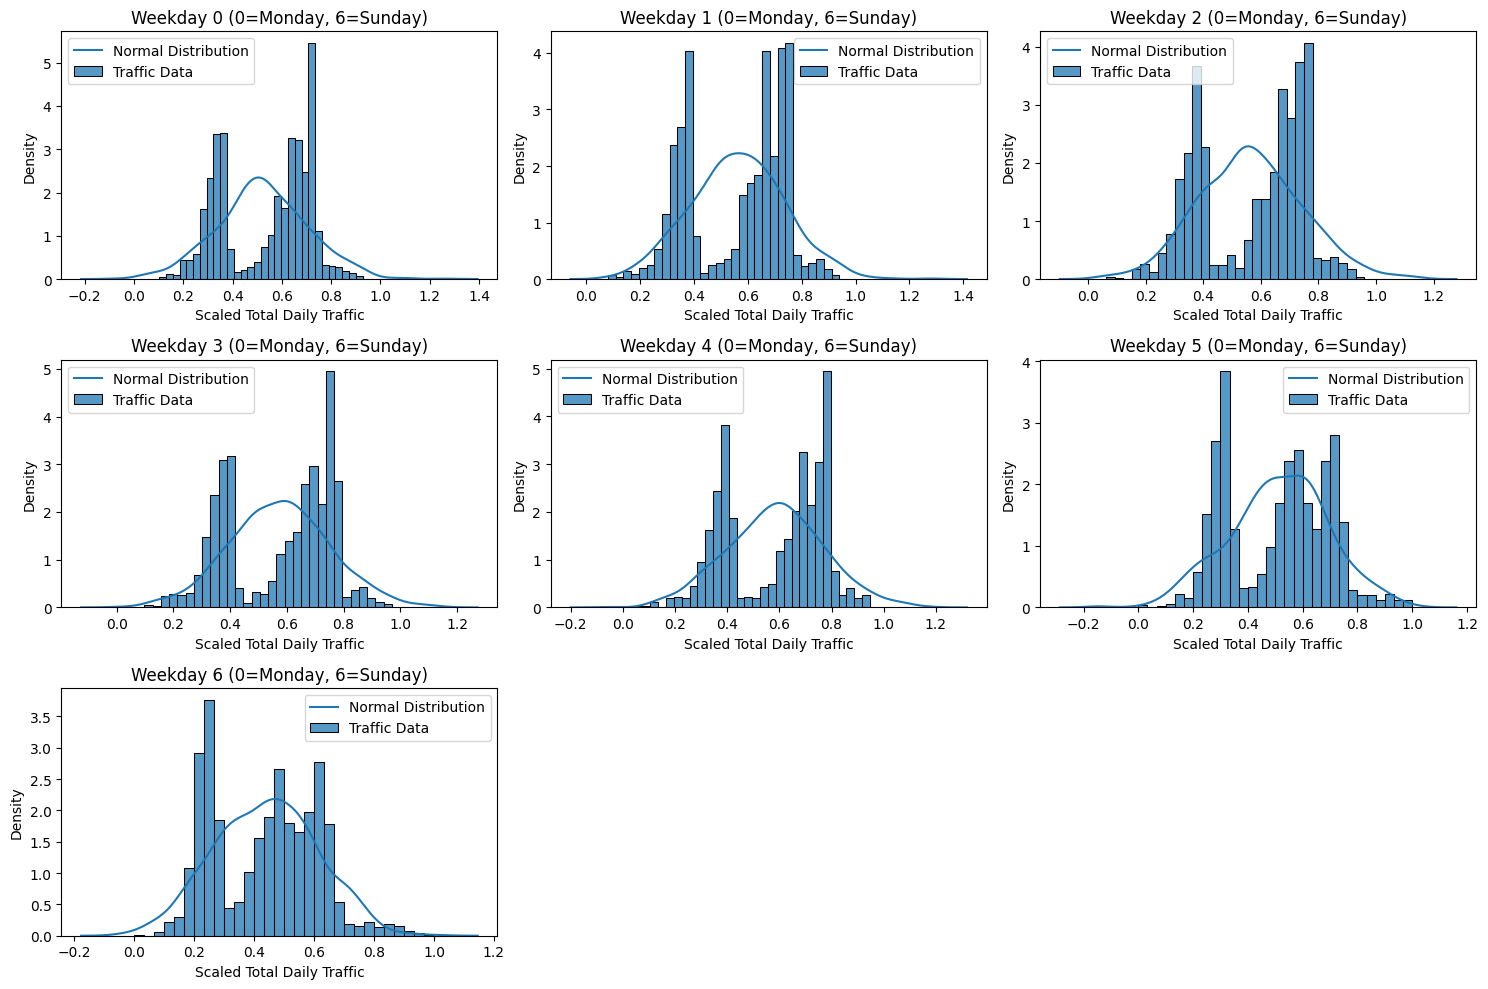

(None, None)

In [84]:
import seaborn as sns
from scipy.stats import norm

# Rescaling 'TotalDailyTraffic' using min-max normalization
traffic_min = df['TotalDailyTraffic'].min()
traffic_max = df['TotalDailyTraffic'].max()
df['ScaledTraffic'] = (df['TotalDailyTraffic'] - traffic_min) / (traffic_max - traffic_min)

# Plotting distributions for each day of the week using 'Weekday_X' columns
plt.figure(figsize=(15, 10))

for i in range(7):
    plt.subplot(3, 3, i+1)
    # Filtering data for each weekday
    weekday_data = df[df[f'Weekday_{i}'] == 1]['ScaledTraffic']
    
    sns.histplot(weekday_data, kde=False, stat="density", bins=30, label="Traffic Data")
    sns.kdeplot(np.random.normal(weekday_data.mean(), weekday_data.std(), 1000), label="Normal Distribution")
    plt.title(f'Weekday {i} (0=Monday, 6=Sunday)')
    plt.xlabel('Scaled Total Daily Traffic')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show(), df.drop(columns='ScaledTraffic', inplace=True)


We still observe the same, non normal distribution. Let's go ahead and try to work with median imputation

In [85]:
# Calculate the median of 'TotalDailyTraffic'
median_traffic = df['TotalDailyTraffic'].median()

# Replace NaN values with the median
df['TotalDailyTraffic'] = df['TotalDailyTraffic'].fillna(median_traffic)

In [64]:
#Alternative: Delete Missing Rows

#missing_values_traffic = df['TotalDailyTraffic'].isnull().sum() #revealed 708 missing values, we will delete these rows
#df = df.dropna(subset=['TotalDailyTraffic'])

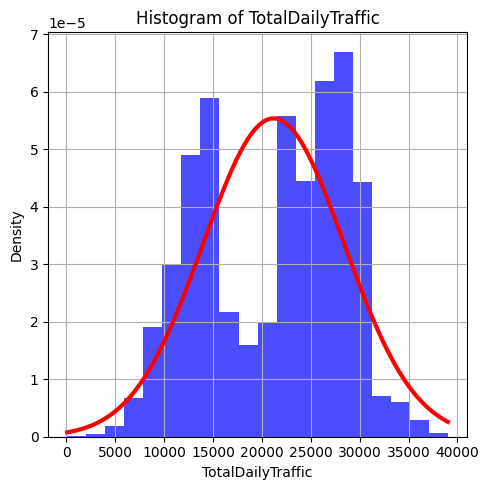

In [86]:
df['TotalDailyTraffic'].replace(0, np.nan, inplace=True)

plt.figure(figsize=(5, 5))

column_data = df['TotalDailyTraffic'].dropna()
plt.hist(column_data, bins=20, color='blue', alpha=0.7, density=True)
plt.title('Histogram of TotalDailyTraffic')
plt.xlabel('TotalDailyTraffic')
plt.ylabel('Density')
plt.grid(True)

# Calculate mean and standard deviation
mu = column_data.mean()
sigma = column_data.std()

# Generate a range of values
x = np.linspace(column_data.min(), column_data.max(), 100)

# Plot the normal distribution curve
plt.plot(x, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)),
                lw=3, color='red')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

we will work with that. if it proves to be bad, we will switch to a more sophisticated approach. now lets look at all the other columns with NaNs.

**Filling the rest of the columns' NaN Values**

For those with a (rather) normal distribution, we will use the mean to impute. These are the following columns: 'NO2', "O3", "O3_max_h1", "O3_nb_h1>120", "T", "T_max_h1", "p", "WD", "Hr"

For those with a clearly skewed distribution, we will use the median. These are the following columns:   ‚NO', 'NOx', 'PM10', (('PM2.5')), 'RainDur', 'WVv', (('WVs'))

In [87]:
# Define the columns with normal distribution and skewed distribution
columns_normal_distr = ["NO2", "O3", "O3_max_h1", "O3_nb_h1>120", "T", "T_max_h1", "p", "WD", "Hr", 'SO2', 'CO', 'PN', 'PM2.5']
columns_skewed_distr = ['NO', 'NOx', 'PM10', 'RainDur', 'WVv', 'WVs', 'StrGlo']

#Impute NaNs in columns with normal distribution using the mean
for col in columns_normal_distr:
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# Impute NaNs in columns with skewed distribution using the median
for col in columns_skewed_distr:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Check if there are any NaN values left in the specified columns
nan_after_imputation = df.isna().sum()


nan_after_imputation


Unnamed: 0           0
Unnamed: 0.1         0
Datum                0
TotalDailyTraffic    0
Street               0
NO                   0
NO2                  0
NOx                  0
O3                   0
O3_max_h1            0
O3_nb_h1>120         0
PM10                 0
PM2.5                0
CO                   0
SO2                  0
PN                   0
RainDur              0
T                    0
T_max_h1             0
p                    0
StrGlo               0
Apr                  0
Aug                  0
Dec                  0
Feb                  0
Jan                  0
Jul                  0
Jun                  0
Mar                  0
May                  0
Nov                  0
Oct                  0
Sep                  0
Weekday_0            0
Weekday_1            0
Weekday_2            0
Weekday_3            0
Weekday_4            0
Weekday_5            0
Weekday_6            0
1.5km_green          0
1km_green            0
500m_green           0
200m_green 

In [67]:
#alternative: drop all rows with nan values
#df = df.dropna()


We have now created three different sets of cleaned data.

For the df_cleaned set we have imputed all NaN's, for the df_cleaned_trafficdropped we have dropped all NaN's in the traffic column, and for the df_cleaned_allnanrowsdropped we have dropped all rows which containes NaN's except for the ones in the traffic column


When building a model, we observed that in the case of the df_cleaned_allnanrowsdropped, the MSE is significantly lower compared to the fully imputed df, while the R2 score is higher.

In [68]:
#df.to_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned.csv')
#df.to_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned_trafficdropped.csv')
#df.to_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned_allnanrowsdropped.csv')

In [88]:
#df.to_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned_highmissingvalues.csv')